# Policy Briefing Title that Matches PDF Title

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucfnany, ucfnath, ucfnql0.

### 

### Structure

-  Import libraries

- 1. Loading and reading data

-  2. Pre-processing

-  3. Processing

-  4. Mapping

### Import Libraries

Before everything, import libraries that will be used to run the following code

In [1]:
import os
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from requests import get
import geopandas as gpd
import seaborn as sns

### 1. Loading data

#### 1.1 Download remote data

We select four years of Inside Airbnb data of 2019 and 2022 for analysing the impacts of Covid-19. We choose these two years as pre-covid period and post-covid period.

All these data are from gzip compressed files, so extraction is needed.

In [2]:
# set a function for caching data
def cache_data(src: str, dest: str) -> str:
    """
    Downloads and caches a remote file locally.
    
    This will save it locally with the remote files and can check if it already exists, 
    so you don't need to download by yourself and won't do it twice.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
        
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src)  # to combine the components back into a valid URL string
    fn = os.path.split(url.path)[-1]  # Extract the filename
    dfn = os.path.join(dest, fn)  # Destination filename

    if not os.path.isfile(dfn):

        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)

        if len(path) >= 1 and path[0] != "":
            os.makedirs(os.path.join(*path), exist_ok=True)

        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)

        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

The function above allows us to combine components for a vaid URL.

For example, if datasets are all from a same website, so the source path will be the same, the only difference is the follwing downloading parts, see code below.

In [3]:
# set the destination directory for data to download in
ddir = os.path.join("data", "insideairbnb")
# source path
spath = "https://orca.casa.ucl.ac.uk/~jreades/data/"

# download Airbnb data in 2019 and 2022, (ab is short as airbnb)
ab19 = pd.read_csv(
    cache_data(spath + "London-2019-11-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)

# or use the link to download directly

ab22 = pd.read_csv(
    cache_data(
        "http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/data/listings.csv.gz",
        ddir,
    ),
    compression="gzip",
    low_memory=False,
)

print("Done.")

Found data/insideairbnb/London-2019-11-listings.csv.gz locally!
Found data/insideairbnb/listings.csv.gz locally!
Done.


#### 1.2 Read data

Have a basic overview of data

Here, we set randomly five rows for a quick overview, and check if there are any duplicated rows.

In [4]:
# define a function for basic overview

def overview(df):
    """
    Basic overview of the dataframe.
    
    This can remove the duplicated rows before having an overview. 
    And choosing 5 rows randomly to have a quick view.
    
    Parameters
    ----------
    df: dataframe
    
    """
    print()
    # check if there are duplicate rows and drop them
    if df.duplicated().sum() > 0:
        print(f"There are {df.duplicated().sum()} duplicated rows")
        df.drop_duplicates(inplace=True, ignore_index=True)
        print("These duplicated columns are dropped.")
    else:
        print("There is no duplicated rows.")
    print(f"Data frame is {df.shape[0]:,} rows x {df.shape[1]} columns")
    print("\n")
    
    # check columns and data type
    print("Basic Overview")
    df.info()

    print("\n")
    print("Random rows for a quick view")
    display(df.sample(5))

Overview the data

In [5]:
overview(ab19)


There are 155 duplicated rows
These duplicated columns are dropped.
Data frame is 85,081 rows x 18 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85081 non-null  object
 1   name                            85081 non-null  object
 2   host_id                         85081 non-null  object
 3   host_name                       85081 non-null  object
 4   neighbourhood_group             85081 non-null  object
 5   neighbourhood                   85081 non-null  object
 6   latitude                        85081 non-null  object
 7   longitude                       85081 non-null  object
 8   room_type                       85081 non-null  object
 9   price                           85081 non-null  object
 10  minimum_nights                  85081 non

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
1788,24911132,Amazing Doble Room In Stockwell.,188332446,Mario And Elena,,Lambeth,51.47388,-.12191,Private room,32,2,97,2019-11-03,5.35,4,338,Private room,11/3/2019 0:00:00
17862,33086076,Bright & Light South Kensington 2 Bed Apartment,15131437,Heritage Aparment Rentals,,Kensington and Chelsea,51.49433,-.17557,Entire home/apt,235,2,7,2019-10-15,1.01,20,12,Entire home/apt,10/15/2019 0:00:00
81203,38503545,Cosy single room in charming Kensington,63091616,Fabio,,Kensington and Chelsea,51.49046,-.19133,Private room,30,5,0,,,21,64,Private room,
46549,30338023,Beautiful Property in White City,68464359,Daniel,,Hammersmith and Fulham,51.52004,-.23,Entire home/apt,80,2,1,2019-03-08,.12,1,0,Entire home/apt,3/8/2019 0:00:00
62274,13307365,Lovely 1 bedroom flat in London Fields,3623267,Elisabeth,,Hackney,51.54252,-.06472,Entire home/apt,69,10,3,2016-07-31,.07,1,0,Entire home/apt,7/31/2016 0:00:00


In [6]:
overview(ab22)



There is no duplicated rows.
Data frame is 69,351 rows x 75 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   6935

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
42485,42133060,https://www.airbnb.com/rooms/42133060,20220910194334,2022-09-11,previous scrape,"Modern 2-Bed Apartment w/Terrace in Fulham, Lo...",Enjoy your stay in London in this bright two-b...,With chic window displays in its many boutique...,https://a0.muscache.com/pictures/8f05c565-a64f...,334225196,...,3.00,4.00,2.00,NaN,f,1,1,0,0,0.03
45955,46324121,https://www.airbnb.com/rooms/46324121,20220910194334,2022-09-11,city scrape,Room from Dec tiill end of Jan in Upper Clapton,NaN,NaN,https://a0.muscache.com/pictures/661aa953-41e7...,2443709,...,NaN,NaN,NaN,NaN,t,3,0,3,0,NaN
43593,43278508,https://www.airbnb.com/rooms/43278508,20220910194334,2022-09-11,city scrape,Double Room In Richmond Enjoy Fast Fiber Inte...,*The house share is down a small private quiet...,NaN,https://a0.muscache.com/pictures/b062b622-1718...,21329248,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
30707,29676329,https://www.airbnb.com/rooms/29676329,20220910194334,2022-09-12,previous scrape,Shoreditch,NaN,NaN,https://a0.muscache.com/pictures/47bb4137-b48c...,75364218,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
37633,37236553,https://www.airbnb.com/rooms/37236553,20220910194334,2022-09-11,city scrape,"""Tranquility Base"" . A secure base away from home","When Apollo 11 landed on Moon it was at ""Tranq...",Vibrant bustling multi etnic area of London wi...,https://a0.muscache.com/pictures/a38ede5c-68bd...,22363610,...,4.85,4.23,4.46,NaN,t,2,2,0,0,0.35


Data in 2019 collcted by November: 85,081 rows.

Data in 2022 collected by November: 69,351rows.



<div class="alert alert-block alert-warning"><b>Possible problem: wrong datatype</b> 
    
There is a problem with the data type: some numeric data is presented as object. These do not match the ones in [Inside Airbnb Data Doctionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).
We're going to fix this problem in the pre-processing phase.
</div>

### 2. Pre-processing

#### 2.1 Datatype



In [7]:
# To check the distribution of numeric columns and find if there is any outliers or problemetic value

# Creating histograms for all columns with numeric values to check their distributions and again check their datatype.
def numeric_cols_hist(df, width, height):
    """
    To create histograms of all numeric columns in the dataframe.
    
    This can have a look at distributions of the numeric columns and check it the datatype is correct.
    
    Parameters
    ----------
    df: dataframe
    
    width: set width of histograms
    
    height: set height of histograms
    
    """
    print('Here, density of values in each numeric column is shown.')
    cols = df.select_dtypes(include=('number')).columns.to_list()
    df[cols].hist(bins=30, figsize=(width, height))
    plt.show()


In [8]:
# print columns in airbnb 2019
ab19.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'room_class',
 'last_review_timestamp']

In [9]:
numeric_cols = ['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [10]:
# change columns datatype into the right ones

for col in numeric_cols:
    ab19[col] = ab19[col].str.strip()  # str.strip() can remove leading and trailing characters
    ab19[col] = ab19[col].apply(pd.to_numeric)

ab19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  float64
 1   name                            85081 non-null  object 
 2   host_id                         84912 non-null  float64
 3   host_name                       85081 non-null  object 
 4   neighbourhood_group             85081 non-null  object 
 5   neighbourhood                   85081 non-null  object 
 6   latitude                        84911 non-null  float64
 7   longitude                       84911 non-null  float64
 8   room_type                       85081 non-null  object 
 9   price                           84911 non-null  float64
 10  minimum_nights                  84911 non-null  float64
 11  number_of_reviews               84911 non-null  float64
 12  last_review                     

In [11]:
# select integer columns
int_cols = ['id', 'host_id', 'price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 
           'availability_365']

#for col in int_cols:
#    ab19[col] = ab19[col].astype(int)
# as error shows IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer
# we need to clean the NA values first, some values could be 0 after changing the datatype
ab19 = ab19.dropna()

for col in int_cols:
    ab19[col] = ab19[col].astype(int)

Still need fix some datatype, for example, `id` should be integer instead of float.

Here, density of values in each numeric column is shown.


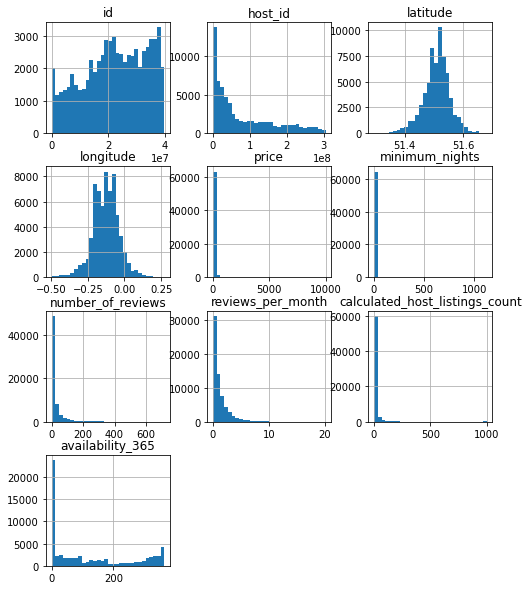

In [12]:
# check the value distributions
numeric_cols_hist(ab19, width=8, height=10)

Seems fine. 

There could be some outliers in column `price`, `minimum_nights`, `number_of_reviews` and the following columns. We will fix this later after choosing the columns we need.

Now the rest three dataframes have wrong datatype showed in `price` column. It should be int.

<div class="alert alert-block alert-warning"><b>Possible problem: ValueError</b> 
    
There is a problem when we wanted to change the datatype of price column, python showed the ValueError: "invalid literal for int() with base 10: '$97.00' " or "Unable to parse string "1,000.00" at position 0".
    
We need two stesp to remove these characters, one for the "$" thing and one for comma. If similar things happen in other column , we can just change the characters and punctuation marks in the function below.
</div>

In [13]:
#ab22['price'] = ab22['price'].astype(int)
#ValueError: invalid literal for int() with base 10: '$97.00'
# and also this error occurs 'Unable to parse string "1,000.00" at position 0'
#so we need to remove the character '$' and the comma ','

def col_to_int(df, col):
    """
    Transform the datatype of price to `int`.
    
    This can remove characters that are leading or tailing the numbers.
    And will remove commas in the string.
    
    Parameters
    ----------
    df: dataframe
    col: 'column name'
    
    """
    df[col] = df[col].str.strip('$') # specific to price column
    df[col] = df[col].str.replace(',', '') #remove comma
    df[col] = df[col].apply(pd.to_numeric) # covert to numeric first
    df[col] = df[col].astype(int)
    df.info() # check
    
col_to_int(ab22, 'price')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

Here, density of values in each numeric column is shown.


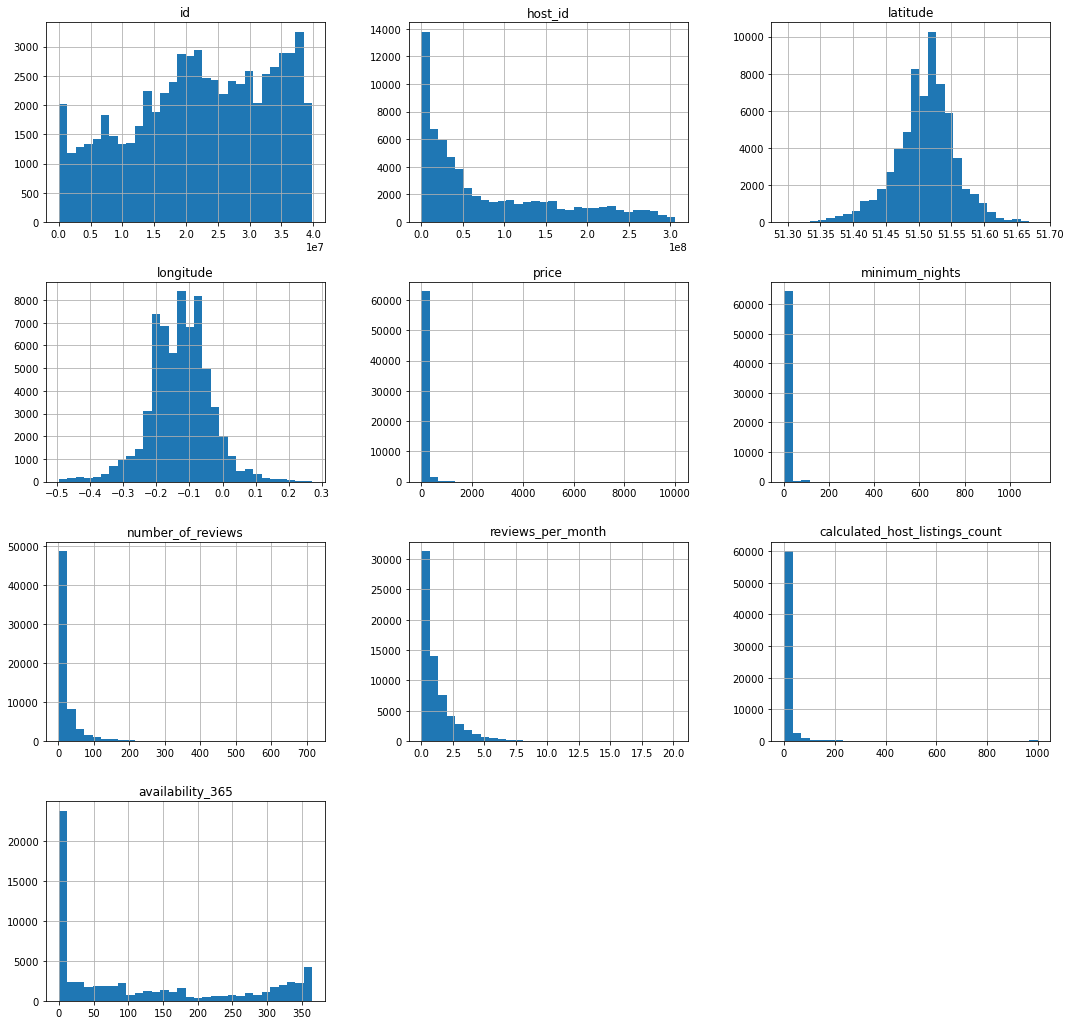

In [14]:
# check the distributions
numeric_cols_hist(ab19, width=18, height=18)

Here, density of values in each numeric column is shown.


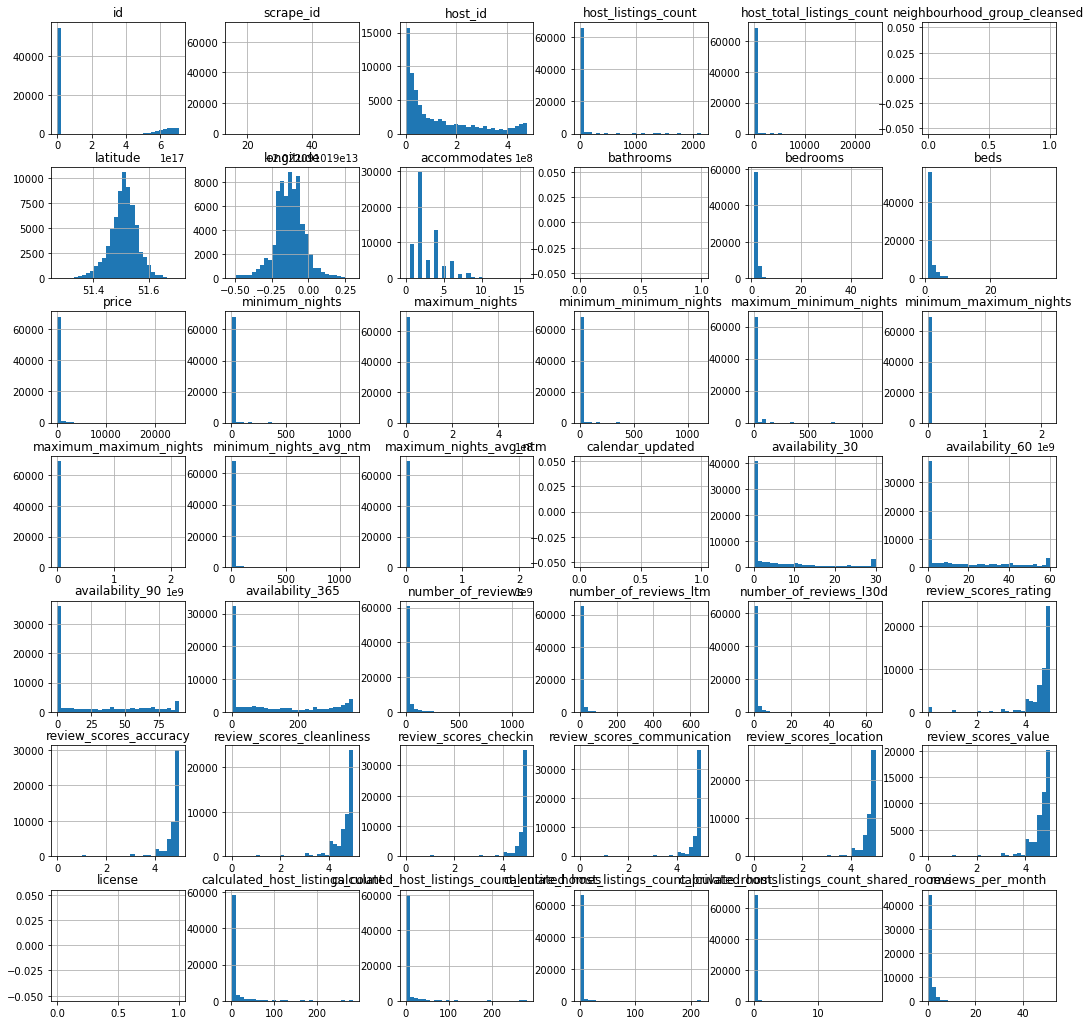

In [15]:
numeric_cols_hist(ab22, width=18, height=18)

#### 2.2 Choosing columns based on our topic

Before continuing our data processing, we're going to select the columns we want first.

We noticed that in `reviews_per_month` from 2019 to 2022 have some empty data values, so we checked the dictionary of this column which refers to "The number of reviews the listing has over the lifetime of the listing". 

Therefore, we can use this as an indicator to define which listings are inactive since they do not have the reviews in the whole year.

In [16]:
ab19.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_class                        0
last_review_timestamp             0
dtype: int64

In [17]:
ab22.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               16780
Length: 75, dtype: int64

##### 2.2.1 Drop na values within the column `name`

In [18]:
ab22 = ab22.dropna(subset=['name'])
ab22.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               16766
Length: 75, dtype: int64

##### 2.2.2 Choosing columns

We're going to analyse changes between pre-covid and post-covid. So we select year of 2019 and 2022 to choose columns.

In [19]:
cols_19 = ['id',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'availability_365']

In the data of 2022, the exact column in borough name should be 'neighbourhood_cleaned'

In [20]:
cols_22 = ['id',
 'host_id',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm', 
 'last_review',
 'reviews_per_month',
 'availability_365']

In [21]:
# new dataframe of 2019
ab19_new = ab19.loc[:,cols_19]
overview(ab19_new)


There is no duplicated rows.
Data frame is 64,938 rows x 11 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64938 entries, 0 to 64937
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 64938 non-null  int64  
 1   host_id            64938 non-null  int64  
 2   neighbourhood      64938 non-null  object 
 3   latitude           64938 non-null  float64
 4   longitude          64938 non-null  float64
 5   price              64938 non-null  int64  
 6   minimum_nights     64938 non-null  int64  
 7   number_of_reviews  64938 non-null  int64  
 8   last_review        64938 non-null  object 
 9   reviews_per_month  64938 non-null  float64
 10  availability_365   64938 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 5.9+ MB


Random rows for a quick view


,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
19138,21528956,115775079,Tower Hamlets,51.52094,-0.05231,68,2,29,2019-10-13,1.34,7
27093,19380178,114041206,Islington,51.54870,-0.11889,110,3,34,2019-09-23,1.35,0
26341,11067969,8006332,Southwark,51.48746,-0.10522,120,3,22,2019-09-26,0.49,353
4928,25600115,7006361,Richmond upon Thames,51.46631,-0.26601,40,2,19,2019-10-31,1.10,360
38202,5308416,27496407,City of London,51.51268,-0.10232,110,2,23,2019-07-25,0.97,104


In [22]:
# new dataframe of 2022
ab22_new = ab22.loc[:,cols_22]
overview(ab22_new)


There is no duplicated rows.
Data frame is 69,330 rows x 12 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69330 entries, 0 to 69350
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      69330 non-null  int64  
 1   host_id                 69330 non-null  int64  
 2   neighbourhood_cleansed  69330 non-null  object 
 3   latitude                69330 non-null  float64
 4   longitude               69330 non-null  float64
 5   price                   69330 non-null  int64  
 6   minimum_nights          69330 non-null  int64  
 7   number_of_reviews       69330 non-null  int64  
 8   number_of_reviews_ltm   69330 non-null  int64  
 9   last_review             52564 non-null  object 
 10  reviews_per_month       52564 non-null  float64
 11  availability_365        69330 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 6.9+ MB



,id,host_id,neighbourhood_cleansed,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365
12368,13686687,78048986,Westminster,51.519300,-0.16138,130,1,7,0,2016-10-26,0.09,0
50358,51687215,418695775,Westminster,51.509842,-0.12830,250,2,2,2,2022-07-05,0.47,136
42926,42664580,5094094,Lewisham,51.479330,-0.05080,30,4,0,0,NaN,NaN,0
9483,10739869,54382954,Camden,51.544240,-0.13757,28,7,0,0,NaN,NaN,0
56269,590494832845187220,206396567,Tower Hamlets,51.532027,-0.05123,60,5,0,0,NaN,NaN,331


Rename the column `neighbourhood_cleansed` to `neighbourhood`, in case for any joins. 

In [23]:
ab22_new.columns = ab22_new.columns.str.replace('neighbourhood_cleansed', 'neighbourhood')
# chenck the column names
ab22_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69330 entries, 0 to 69350
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     69330 non-null  int64  
 1   host_id                69330 non-null  int64  
 2   neighbourhood          69330 non-null  object 
 3   latitude               69330 non-null  float64
 4   longitude              69330 non-null  float64
 5   price                  69330 non-null  int64  
 6   minimum_nights         69330 non-null  int64  
 7   number_of_reviews      69330 non-null  int64  
 8   number_of_reviews_ltm  69330 non-null  int64  
 9   last_review            52564 non-null  object 
 10  reviews_per_month      52564 non-null  float64
 11  availability_365       69330 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 6.9+ MB


### 3 Processing

In this phase, we'll select columns we need and generate dataframes to be analysed.

#### 3.1 Demand Listings/Group data by borough

We will use `number_of_reviews_ltm` (The number of reviews the listing has in the last 12 months) as the indicator which listings are in demand in the short-rental market during that year.

Data of 2019 does not have the column `number_of_reviews_ltm` . And after we checked the date distribution of the last reviews in 2019, we found that the data included reviews left before 2019. So we're going to select reviews activate only in 2019 as the demand listings in 2019.

In [24]:
# change the object datatype into date

In [25]:
date_cols = ['last_review']

array([[<AxesSubplot:title={'center':'last_review'}>]], dtype=object)

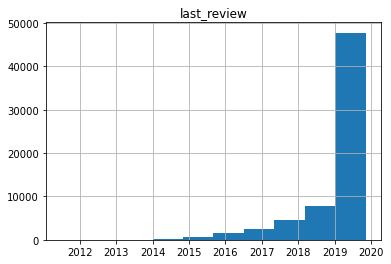

In [26]:
for col in date_cols:
    ab19_new[col] = pd.to_datetime(ab19_new[col])

ab19_new.hist(column = date_cols)

Through the distribution of date, there are some outliers that the dates do not belong with 2019. These listings are not active in 2019, some even not activated since 2014.

As said in the above, we will extract the active ones in 2019.

And the listings in `demand19` are considered active in 2018-Nov to 2019-Nov. However, when compared with activate listings in 2022, some of them could be deactived, or remained.

In [27]:
# 2019 listings was collected on November 2019
# drop last reviews left before 2018-11-01
demand_19 = ab19_new[ab19_new['last_review'].ge('2018-11-01')]
demand_19.sample(5)

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
2596,38537563,293932665,Lambeth,51.45396,-0.11986,60,1,2,2019-11-03,2.00,197
34820,32359176,242939869,Merton,51.43088,-0.20604,64,2,2,2019-08-18,0.34,0
20474,18525818,6921382,Merton,51.39264,-0.22426,38,1,18,2019-10-11,0.60,34
42137,14088818,988379,Camden,51.51979,-0.13680,100,2,45,2019-06-20,1.14,362
5896,34917319,167556137,Camden,51.53576,-0.13860,125,1,11,2019-10-30,2.01,142


In [28]:
demand_19_grouped = demand_19.groupby("neighbourhood")
#list(demand_19_grouped)

In [29]:
# 2022 datatype
for col in date_cols:
    ab22_new[col] = pd.to_datetime(ab22_new[col])

In [30]:
# drop listings do not have reviews in 2022
demand_22 = ab22_new[~(ab22_new['number_of_reviews_ltm'] <= 0)]
demand_22.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365
0,13913,54730,Islington,51.56861,-0.11270,50,1,30,9,2022-07-15,0.20,343
2,284532,1481412,Tower Hamlets,51.52851,-0.07426,90,5,42,1,2022-01-04,0.34,222
4,17402,67564,Westminster,51.52195,-0.14094,379,4,51,8,2022-09-06,0.36,249
5,107048,259088,Islington,51.52478,-0.10484,180,4,493,20,2022-09-02,3.59,236
6,107051,554519,Westminster,51.52055,-0.18317,204,2,581,66,2022-09-02,4.26,193


In [31]:
demand_22_grouped = demand_22.groupby(by="neighbourhood")

#list(demand_22_grouped)

#### 3.2 Supply listings/Group data by borough

As the data is collected from AirBnb. After removing the NA values, the listings are the supply listings.

In [32]:
supply_19 = ab19_new
supply_22 = ab22_new

In [33]:
supply_19_grouped = supply_19.groupby("neighbourhood")
#list(supply_19_grouped)

In [34]:
supply_22_grouped = supply_22.groupby("neighbourhood")
#list(supply_22_grouped)

#### 3.3 Supply changes in 2019, and 2022

##### Determine the number of listings in each region by looking at how many times each borough appears in the data.

In [35]:
import pandas as pd
number_of_listings_19 = supply_19.value_counts(supply_19['neighbourhood'])
number_of_listings_19

neighbourhood
Westminster               7368
Tower Hamlets             6441
Hackney                   4842
Camden                    4795
Kensington and Chelsea    4390
Islington                 3983
Southwark                 3911
Lambeth                   3895
Hammersmith and Fulham    3276
Wandsworth                3237
Brent                     1955
Lewisham                  1762
Haringey                  1642
Newham                    1460
Ealing                    1321
Greenwich                 1232
Barnet                    1132
Waltham Forest            1074
Merton                     973
Richmond upon Thames       904
Croydon                    800
Hounslow                   744
Redbridge                  499
Bromley                    495
Hillingdon                 470
Enfield                    464
Kingston upon Thames       412
Harrow                     340
City of London             324
Barking and Dagenham       249
Sutton                     216
Havering                 

In [36]:
import pandas as pd
number_of_listings_22= supply_22.value_counts(supply_22['neighbourhood'])
number_of_listings_22

neighbourhood
Westminster               7760
Tower Hamlets             5591
Hackney                   5166
Camden                    4706
Kensington and Chelsea    4612
Southwark                 3966
Islington                 3788
Lambeth                   3717
Wandsworth                3473
Hammersmith and Fulham    2995
Brent                     2068
Lewisham                  2016
Haringey                  1897
Newham                    1681
Barnet                    1611
Ealing                    1553
Greenwich                 1514
Waltham Forest            1322
Merton                    1113
Richmond upon Thames      1108
Hounslow                  1078
Croydon                   1066
Hillingdon                 714
Redbridge                  669
Enfield                    617
Kingston upon Thames       609
Bromley                    593
Harrow                     444
Barking and Dagenham       433
City of London             424
Bexley                     411
Havering                 

In [37]:
# join this two dataframes through neighbourhood name
supply_19_22 = pd.concat([number_of_listings_19, number_of_listings_22], axis = 1)

supply_19_22.columns = ['supply_19', 'supply_22']

supply_19_22

,supply_19,supply_22
neighbourhood,,
Westminster,7368,7760
Tower Hamlets,6441,5591
Hackney,4842,5166
Camden,4795,4706
Kensington and Chelsea,4390,4612
Islington,3983,3788
Southwark,3911,3966
Lambeth,3895,3717
Hammersmith and Fulham,3276,2995


In [38]:
supply_19_22['change_percent'] = (supply_19_22['supply_22'] - supply_19_22['supply_19']) / supply_19_22['supply_22']

supply_19_22.sort_values(by='change_percent', ascending=False)

,supply_19,supply_22,change_percent
neighbourhood,,,
Bexley,159,411,0.613139
Havering,173,329,0.474164
Barking and Dagenham,249,433,0.424942
Hillingdon,470,714,0.341737
Kingston upon Thames,412,609,0.323481
Hounslow,744,1078,0.309833
Barnet,1132,1611,0.297331
Redbridge,499,669,0.254111
Croydon,800,1066,0.249531


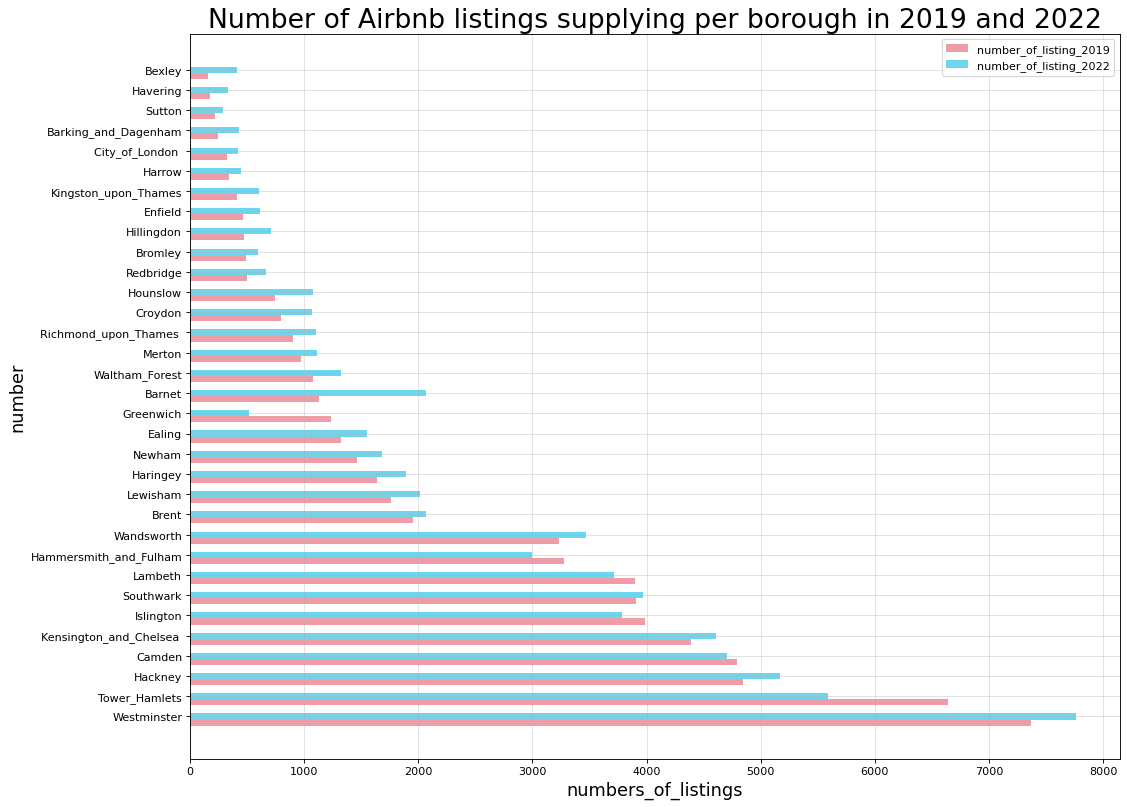

In [77]:
from matplotlib import pyplot as plt
from matplotlib import font_manager



#set figure size
plt.figure(figsize=(15,12),dpi = 80)

#set dataframes
a = ["Westminster","Tower_Hamlets","Hackney","Camden","Kensington_and_Chelsea ","Islington","Southwark"
    ,"Lambeth","Hammersmith_and_Fulham","Wandsworth","Brent","Lewisham","Haringey","Newham","Ealing"
    ,"Greenwich","Barnet","Waltham_Forest","Merton","Richmond_upon_Thames ","Croydon","Hounslow","Redbridge"
    ,"Bromley","Hillingdon","Enfield","Kingston_upon_Thames","Harrow","City_of_London ","Barking_and_Dagenham","Sutton",
     "Havering","Bexley"]
b_1 = [7368,6641,4842,4795,4390,3983,3911,3895,3276,3237,1955,1762,1642,1460,1321,1232,1132,1074,973,904,800,744,499,495,470,464,412,340,324,249,216,173,159]
b_2 = [7760,5591,5166,4706,4612,3788,3966,3717,2995,3473,2068,2016,1897,1681,1553,514,2068,1322,1113,1108,1066,1078,669,593,714,617,609,444,424,433,286,329,411]

height = 0.3
a1 = list(range(len(a)))
a2 = [i+height for i in a1]# Axis Offset
#a3 = [i+height*2 for i in a1]

#plot to check
plt.barh(range(len(a)),b_1,height= height,label = "number_of_listing_2019",color = "#ee9ca7")
plt.barh(a2,b_2,height= height,label = "number_of_listing_2022",color = "#6dd5ed")


#plot grids
plt.grid(alpha = 0.4)

# add lables in y axis 
plt.yticks(a2,a,fontsize = 10)

# add legend
plt.legend()

# add x axis lables and title
plt.xlabel("numbers_of_listings",fontsize = 16)
plt.ylabel("number",fontsize = 16)
plt.title("Number of Airbnb listings supplying per borough in 2019 and 2022",fontsize = 24)

#plot to check
plt.show()



#### 3.4 Demand changes in 2019, and 2022

##### Determine the number of listings in each region

In [40]:
number_19 = demand_19.value_counts(demand_19['neighbourhood'])
number_19.shape[0]

33

In [41]:
number_19

neighbourhood
Westminster               6262
Tower Hamlets             4840
Camden                    3891
Kensington and Chelsea    3591
Hackney                   3328
Southwark                 2950
Lambeth                   2936
Islington                 2912
Hammersmith and Fulham    2565
Wandsworth                2400
Brent                     1552
Lewisham                  1232
Haringey                  1182
Newham                    1170
Ealing                    1004
Greenwich                  945
Barnet                     901
Waltham Forest             805
Merton                     712
Richmond upon Thames       678
Croydon                    633
Hounslow                   588
Redbridge                  396
Hillingdon                 395
Bromley                    379
Enfield                    361
Kingston upon Thames       317
City of London             272
Harrow                     264
Barking and Dagenham       205
Sutton                     166
Havering                 

In [42]:
number_22= supply_22.value_counts(demand_22['neighbourhood'])
number_22.shape[0]

33

Possible problem: Series cannot be merged.

Here, the datatype of counts for each borough is series, thus we cannot use `pd.merge`, instead, we used `pd.concat` to generate a new dataframe of the demand counts of boroughs. 

And when renaming this core dataframes, just use `df.columns = ['col_name']` rather than `df.rename` (not working).

In [43]:
# join this two dataframes through neighbourhood name
demand_19_22 = pd.concat([number_19, number_22], axis = 1)

demand_19_22.columns = ['demands_19', 'demands_22']

demand_19_22

,demands_19,demands_22
neighbourhood,,
Westminster,6262,3992
Tower Hamlets,4840,2130
Camden,3891,2447
Kensington and Chelsea,3591,2375
Hackney,3328,1880
Southwark,2950,1675
Lambeth,2936,1559
Islington,2912,1454
Hammersmith and Fulham,2565,1345


In [44]:
demand_19_22['change_percent'] = (demand_19_22['demands_22'] - demand_19_22['demands_19']) / demand_19_22['demands_22']

demand_19_22.sort_values(by='change_percent', ascending=False)

,demands_19,demands_22,change_percent
neighbourhood,,,
Bexley,115,216,0.467593
Havering,133,174,0.235632
Barking and Dagenham,205,209,0.019139
Hillingdon,395,401,0.014963
Kingston upon Thames,317,302,-0.049669
Enfield,361,340,-0.061765
Hounslow,588,546,-0.076923
City of London,272,242,-0.123967
Croydon,633,550,-0.150909


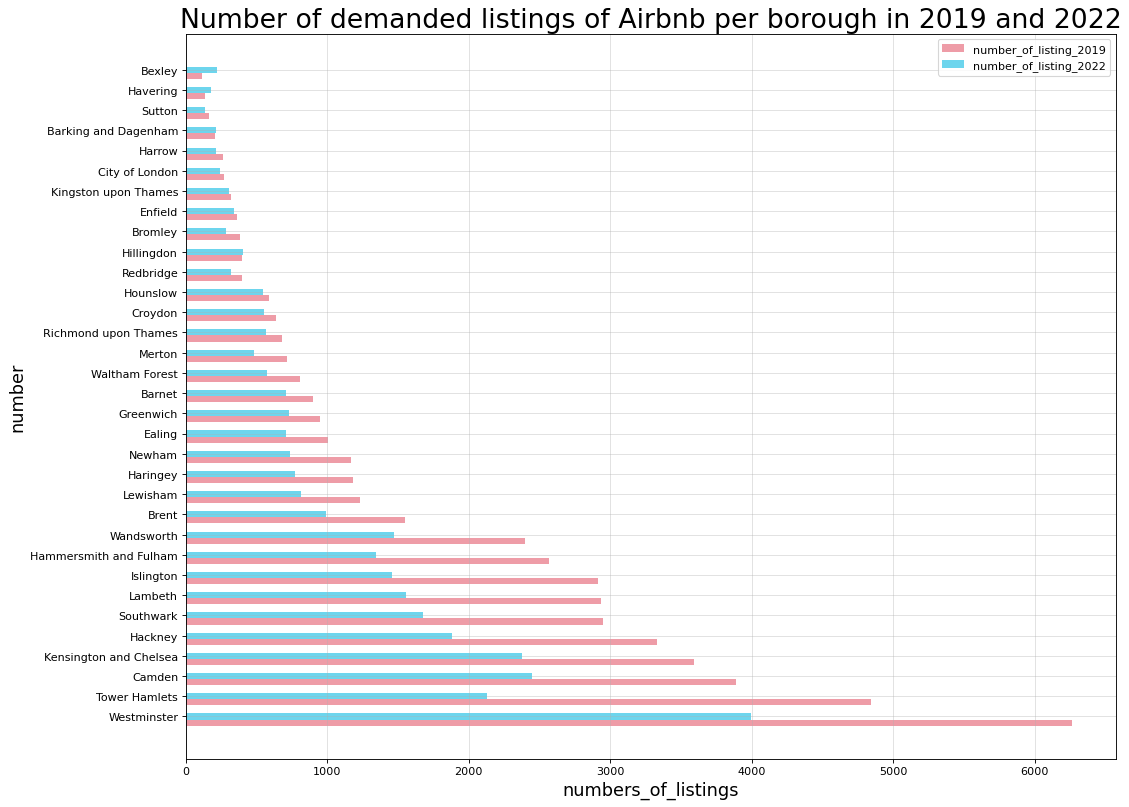

In [76]:
from matplotlib import pyplot as plt
from matplotlib import font_manager



#set figure size
plt.figure(figsize=(15,12),dpi = 80)

#set dataframes
a = demand_19_22.index.tolist()
b_1 = demand_19_22.iloc[:, 0].tolist()
b_2 = demand_19_22.iloc[:, 1].tolist()

height = 0.3
a1 = list(range(len(a)))
a2 = [i+height for i in a1]# Axis Offset
#a3 = [i+height*2 for i in a1]

#plot to check
plt.barh(range(len(a)),b_1,height= height,label = "number_of_listing_2019",color = "#ee9ca7")
plt.barh(a2,b_2,height= height,label = "number_of_listing_2022",color = "#6dd5ed")


#plot grids
plt.grid(alpha = 0.4)

# add lables in y axis 
plt.yticks(a2,a,fontsize = 10)

# add legend
plt.legend()

# add x axis lables and title
plt.xlabel("numbers_of_listings",fontsize = 16)
plt.ylabel("number",fontsize = 16)
plt.title("Number of demanded listings of Airbnb per borough in 2019 and 2022",fontsize = 24)

#plot to check
plt.show()



in the follwing part can only get the remained listings, which have the same ids in 2019 and 2022.

In [46]:
# two listings demand_19, and demand_22
print(f"There are {demand_19.shape[0]} listings in demand in 2019")
print(f"There are {demand_22.shape[0]} listings in demand in 2022.")

There are 50080 listings in demand in 2019
There are 31323 listings in demand in 2022.


There is a significant reduce in demand after the covid.

In [47]:
remain_list = pd.merge(demand_19, demand_22, how ='inner', on =['id'])

remain_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     9514 non-null   int64         
 1   host_id_x              9514 non-null   int64         
 2   neighbourhood_x        9514 non-null   object        
 3   latitude_x             9514 non-null   float64       
 4   longitude_x            9514 non-null   float64       
 5   price_x                9514 non-null   int64         
 6   minimum_nights_x       9514 non-null   int64         
 7   number_of_reviews_x    9514 non-null   int64         
 8   last_review_x          9514 non-null   datetime64[ns]
 9   reviews_per_month_x    9514 non-null   float64       
 10  availability_365_x     9514 non-null   int64         
 11  host_id_y              9514 non-null   int64         
 12  neighbourhood_y        9514 non-null   object        
 13  lat

The latitude, longitude of the same id listing are not accurate, since Airbnb announced that they will not reveal the real location of the listing.

So here, we just use the newest ones as well as neighbourhood.

In [48]:
remain_list.rename(columns={'host_id_y':'host_id', 'neighbourhood_y':'neighbourhood', 
                  'latitude_y':'latitude', 'longitude_y':'longitude'}, inplace=True)

remain_list.head()

,id,host_id_x,neighbourhood_x,latitude_x,longitude_x,price_x,minimum_nights_x,number_of_reviews_x,last_review_x,reviews_per_month_x,...,neighbourhood,latitude,longitude,price_y,minimum_nights_y,number_of_reviews_y,number_of_reviews_ltm,last_review_y,reviews_per_month_y,availability_365_y
0,9582415,49602995,Richmond upon Thames,51.44473,-0.37900,35,1,47,2019-11-06,2.27,...,Richmond upon Thames,51.44521,-0.38031,39,21,95,36,2022-08-18,1.72,318
1,42010,157884,Barnet,51.58611,-0.16272,45,2,490,2019-11-05,4.41,...,Barnet,51.58590,-0.16434,60,4,527,17,2022-08-17,3.62,252
2,387835,1940607,Richmond upon Thames,51.42833,-0.34646,39,1,140,2019-11-05,1.51,...,Richmond upon Thames,51.42863,-0.34688,39,1,201,35,2022-06-19,1.58,307
3,350588,1775224,Islington,51.53638,-0.11896,98,2,120,2019-11-05,3.06,...,Islington,51.53555,-0.11739,75,2,199,51,2022-09-04,2.69,1
4,469187,1952786,Wandsworth,51.47386,-0.16397,56,1,331,2019-11-05,3.69,...,Wandsworth,51.47537,-0.16432,60,1,414,46,2022-08-29,3.33,289


Here, we notice that although we intersected the two listings with same `id` , some column values may changed over time, for example, the price.

We're going to use these `_x`, `_y` columns to generate new columns showing changes in percentages.

In [49]:
# price changes
remain_list['price_change'] = (remain_list['price_y'] - remain_list['price_x']) *100 / (remain_list['price_x'])

# minimum_nights changes
remain_list['mim_nights_change'] = (remain_list['minimum_nights_y'] - remain_list['minimum_nights_x']) *100 / (remain_list['minimum_nights_x'])

# demand change (reviews_per_month)
remain_list['demand_change'] = (remain_list['reviews_per_month_y'] - remain_list['reviews_per_month_x'])*100 / (remain_list['reviews_per_month_x'])

# availability changes
remain_list['availability_365_change'] = (remain_list['availability_365_y'] - remain_list['availability_365_x'])*100 / (remain_list['availability_365_x'])


In [50]:
remain_list.columns.tolist()

['id',
 'host_id_x',
 'neighbourhood_x',
 'latitude_x',
 'longitude_x',
 'price_x',
 'minimum_nights_x',
 'number_of_reviews_x',
 'last_review_x',
 'reviews_per_month_x',
 'availability_365_x',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'price_y',
 'minimum_nights_y',
 'number_of_reviews_y',
 'number_of_reviews_ltm',
 'last_review_y',
 'reviews_per_month_y',
 'availability_365_y',
 'price_change',
 'mim_nights_change',
 'demand_change',
 'availability_365_change']

In [51]:
# again select columns we need
select_cols = ['id', 'host_id','neighbourhood', 'latitude', 'longitude','price_change', 
               'mim_nights_change', 'demand_change', 'availability_365_change']
remain_change = remain_list.loc[:, select_cols]

remain_change.head()

,id,host_id,neighbourhood,latitude,longitude,price_change,mim_nights_change,demand_change,availability_365_change
0,9582415,49602995,Richmond upon Thames,51.44521,-0.38031,11.428571,2000.0,-24.229075,14.388489
1,42010,157884,Barnet,51.58590,-0.16434,33.333333,100.0,-17.913832,-22.699387
2,387835,1940607,Richmond upon Thames,51.42863,-0.34688,0.000000,0.0,4.635762,1.655629
3,350588,1775224,Islington,51.53555,-0.11739,-23.469388,0.0,-12.091503,-98.958333
4,469187,1952786,Wandsworth,51.47537,-0.16432,7.142857,0.0,-9.756098,-3.344482


From 2019 to 2022, we can observe that some listings are facing the declined demand needs, but in the above when we considering the supply, most boroughs have increased supplies. And this could be a finding.

Before comparing the demand and supply, we are tending to get the deactivated listings and increasing listings in demmand part.

## 4. Mapping

### 4.1 loading the shapefile

In [52]:
# loading london boros
spath = 'https://github.com/jreades/fsds/blob/master/data/src/' # source path
ddir  = os.path.join('data','geo') # destination directory
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )

Found data/geo/Water.gpkg locally!
Found data/geo/Boroughs.gpkg locally!
Found data/geo/Greenspace.gpkg locally!


In [79]:
boros.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."


In [83]:
from fiona.crs import from_string
crs = from_string("+proj=longlat +datum=WGS84 +no_defs") 
boros = boros.to_crs(crs=crs) 

In [84]:
boros.crs

<Geographic 2D CRS: +proj=longlat +datum=WGS84 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
boros.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51..."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


### 4.2 geo transform

#### 4.2.1 supply and demand listings

In [53]:
# transform the listings in 2019 first
gdf_supply_19 = gpd.GeoDataFrame(
    supply_19, geometry=gpd.points_from_xy(supply_19.longitude, supply_19.latitude))

gdf_supply_19

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,geometry
0,9582415,49602995,Richmond upon Thames,51.44473,-0.37900,35,1,47,2019-11-06,2.27,278,POINT (-0.37900 51.44473)
1,23013522,70374572,Hounslow,51.45867,-0.34444,19,1,131,2019-11-06,6.52,23,POINT (-0.34444 51.45867)
2,25796711,25587547,Hammersmith and Fulham,51.47398,-0.21531,103,7,8,2019-11-06,0.51,317,POINT (-0.21531 51.47398)
3,29060134,57607790,Hillingdon,51.52716,-0.44164,85,14,5,2019-11-06,0.40,346,POINT (-0.44164 51.52716)
4,30374086,228095684,Barnet,51.59118,-0.16670,85,3,16,2019-11-06,1.52,139,POINT (-0.16670 51.59118)
...,...,...,...,...,...,...,...,...,...,...,...,...
64933,306405,1575800,Barking and Dagenham,51.54259,0.15386,41,4,3,2012-05-27,0.03,365,POINT (0.15386 51.54259)
64934,388306,1942893,Wandsworth,51.46107,-0.21945,25,1,1,2012-03-26,0.01,268,POINT (-0.21945 51.46107)
64935,109299,261091,Hackney,51.54599,-0.07426,125,14,3,2011-11-22,0.03,364,POINT (-0.07426 51.54599)
64936,241133,542769,Barnet,51.60552,-0.14845,45,120,1,2011-10-21,0.01,280,POINT (-0.14845 51.60552)


In [54]:
gdf_demand_19 = gpd.GeoDataFrame(
    demand_19, geometry=gpd.points_from_xy(demand_19.longitude, demand_19.latitude))

gdf_demand_19

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,geometry
0,9582415,49602995,Richmond upon Thames,51.44473,-0.37900,35,1,47,2019-11-06,2.27,278,POINT (-0.37900 51.44473)
1,23013522,70374572,Hounslow,51.45867,-0.34444,19,1,131,2019-11-06,6.52,23,POINT (-0.34444 51.45867)
2,25796711,25587547,Hammersmith and Fulham,51.47398,-0.21531,103,7,8,2019-11-06,0.51,317,POINT (-0.21531 51.47398)
3,29060134,57607790,Hillingdon,51.52716,-0.44164,85,14,5,2019-11-06,0.40,346,POINT (-0.44164 51.52716)
4,30374086,228095684,Barnet,51.59118,-0.16670,85,3,16,2019-11-06,1.52,139,POINT (-0.16670 51.59118)
...,...,...,...,...,...,...,...,...,...,...,...,...
50075,28386872,59741724,Hammersmith and Fulham,51.49311,-0.20798,120,1,3,2018-11-01,0.21,0,POINT (-0.20798 51.49311)
50076,28435140,5002654,Southwark,51.42539,-0.07929,50,3,5,2018-11-01,0.36,0,POINT (-0.07929 51.42539)
50077,28956448,132780496,Lambeth,51.42403,-0.12636,99,1,1,2018-11-01,0.08,1,POINT (-0.12636 51.42403)
50078,29213579,220102819,Camden,51.54538,-0.15058,59,2,2,2018-11-01,0.16,180,POINT (-0.15058 51.54538)


In [55]:
# 2022
gdf_supply_22 = gpd.GeoDataFrame(
    supply_22, geometry=gpd.points_from_xy(supply_22.longitude, supply_22.latitude))

gdf_supply_22

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365,geometry
0,13913,54730,Islington,51.56861,-0.11270,50,1,30,9,2022-07-15,0.20,343,POINT (-0.11270 51.56861)
1,15400,60302,Kensington and Chelsea,51.48780,-0.16813,75,3,89,0,2020-03-16,0.57,70,POINT (-0.16813 51.48780)
2,284532,1481412,Tower Hamlets,51.52851,-0.07426,90,5,42,1,2022-01-04,0.34,222,POINT (-0.07426 51.52851)
3,106332,264345,Tower Hamlets,51.52874,-0.05396,55,3,65,0,2016-06-10,0.47,74,POINT (-0.05396 51.52874)
4,17402,67564,Westminster,51.52195,-0.14094,379,4,51,8,2022-09-06,0.36,249,POINT (-0.14094 51.52195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,49977905,Greenwich,51.48300,-0.01346,55,5,67,1,2021-10-03,0.84,0,POINT (-0.01346 51.48300)
69347,20277958,1132775,Southwark,51.50914,-0.10192,201,3,61,12,2022-09-09,0.99,0,POINT (-0.10192 51.50914)
69348,20512703,1706966,Richmond upon Thames,51.40571,-0.35325,246,3,6,6,2022-08-31,1.49,4,POINT (-0.35325 51.40571)
69349,49698549,34213667,Richmond upon Thames,51.41029,-0.35975,250,3,9,4,2022-07-18,0.61,2,POINT (-0.35975 51.41029)


In [56]:
gdf_demand_22 = gpd.GeoDataFrame(
    demand_22, geometry=gpd.points_from_xy(demand_22.longitude, demand_22.latitude))

gdf_demand_22

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365,geometry
0,13913,54730,Islington,51.56861,-0.11270,50,1,30,9,2022-07-15,0.20,343,POINT (-0.11270 51.56861)
2,284532,1481412,Tower Hamlets,51.52851,-0.07426,90,5,42,1,2022-01-04,0.34,222,POINT (-0.07426 51.52851)
4,17402,67564,Westminster,51.52195,-0.14094,379,4,51,8,2022-09-06,0.36,249,POINT (-0.14094 51.52195)
5,107048,259088,Islington,51.52478,-0.10484,180,4,493,20,2022-09-02,3.59,236,POINT (-0.10484 51.52478)
6,107051,554519,Westminster,51.52055,-0.18317,204,2,581,66,2022-09-02,4.26,193,POINT (-0.18317 51.52055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,49977905,Greenwich,51.48300,-0.01346,55,5,67,1,2021-10-03,0.84,0,POINT (-0.01346 51.48300)
69347,20277958,1132775,Southwark,51.50914,-0.10192,201,3,61,12,2022-09-09,0.99,0,POINT (-0.10192 51.50914)
69348,20512703,1706966,Richmond upon Thames,51.40571,-0.35325,246,3,6,6,2022-08-31,1.49,4,POINT (-0.35325 51.40571)
69349,49698549,34213667,Richmond upon Thames,51.41029,-0.35975,250,3,9,4,2022-07-18,0.61,2,POINT (-0.35975 51.41029)


##### set crs epsg:27700

In [62]:
# check the crs
# gdf_supply_19.crs shows empty, there is no crs so we need to set it first.

gdf_supply_19.crs = "EPSG:27700"

# check
gdf_supply_19.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [63]:
gdf_demand_19.crs = "EPSG:27700"
gdf_demand_19.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [64]:
gdf_supply_22.crs = "EPSG:27700"
gdf_supply_22.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [66]:
gdf_demand_22.crs = "EPSG:27700"
gdf_demand_22.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

### 4.3 Map plotting

In [67]:
import geopandas
import contextily as cx # retrieve web map tiles from several sources (OpenStreetMap, Stamen)

In [75]:
# plot our first map of supply in 2019
#ax = gdf_supply_19.plot(figsize=(20, 25), alpha=0.5, edgecolor='k')

# set the zoom level of 13 as the city level and the map style
#cx.add_basemap(ax, zoom=13) 

#### 4.3.1 Supply changes

For supply listings, we're using **availability_365** as indicators. 

This varaible shows "The availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host."

So we can use this to show whether listings are supplying during the year and how many days they can supply.

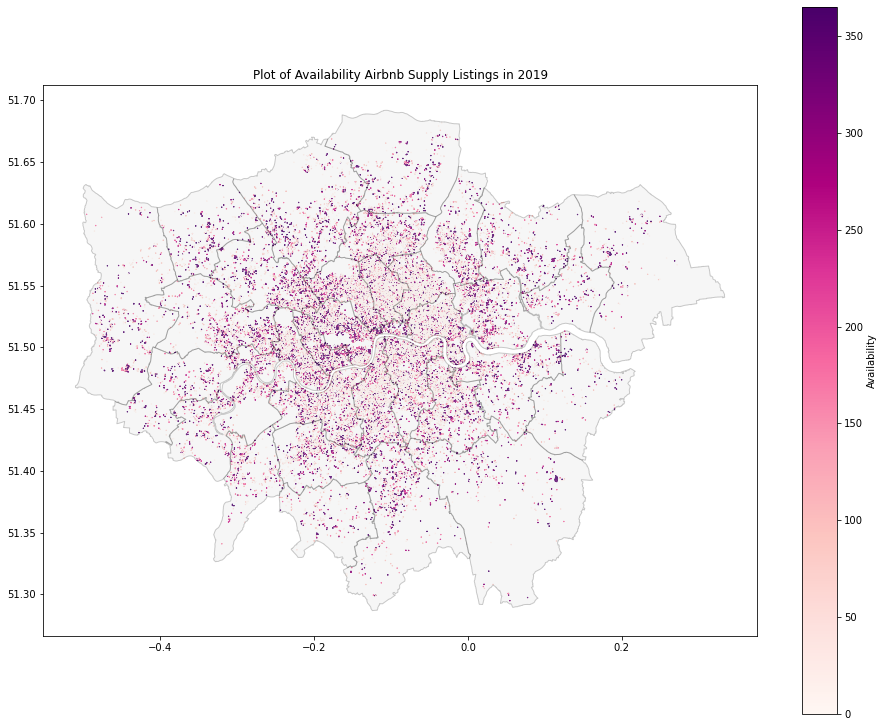

In [107]:
# first plot for supply 19, first check
ax = gdf_supply_19.plot(figsize = (16, 13), marker='*', markersize=0.3, 
         column = 'availability_365', cmap = 'RdPu', 
         legend = True, legend_kwds = {'label':'Availability'});
ax.set_title("Plot of Availability Airbnb Supply Listings in 2019");

boros.plot(ax = ax, edgecolor='black', facecolor='lightgrey', alpha=0.2);

no outliers. Then we plot the 2022 one to see if there are any changes.

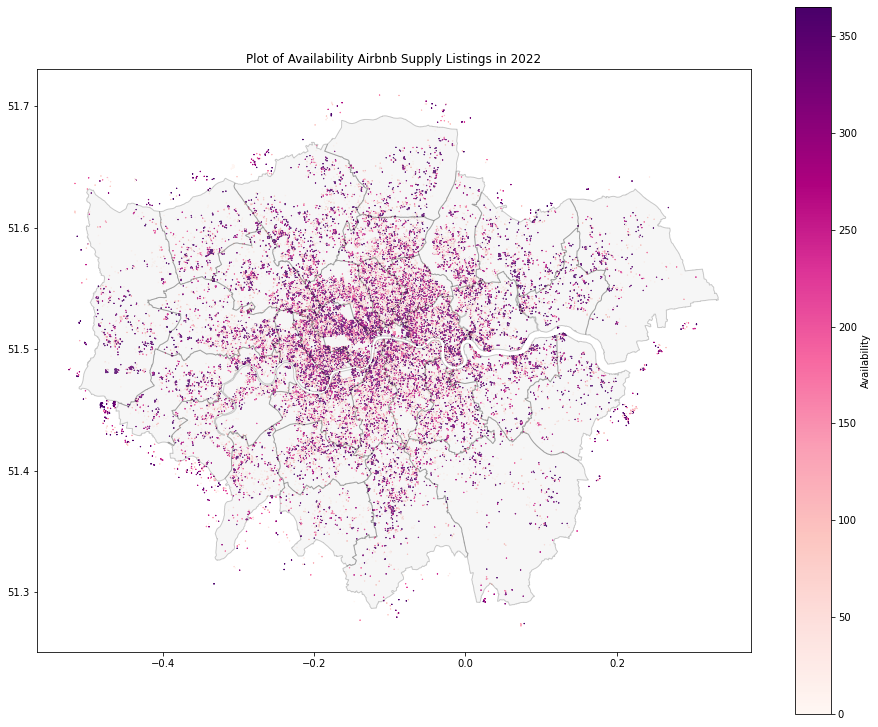

In [106]:
# first plot for supply 19, first check
ax = gdf_supply_22.plot(figsize = (16, 13), marker='*', markersize=0.3, 
         column = 'availability_365', cmap = 'RdPu', 
         legend = True, legend_kwds = {'label':'Availability'});
ax.set_title("Plot of Availability Airbnb Supply Listings in 2022");

boros.plot(ax = ax, edgecolor='black', facecolor='lightgrey', alpha=0.2);

In [94]:
# a lof ot outliers in data 2022, so we need to clean the outliers.

In [113]:
# some listings are not in the area of greater London, latitude and longitude issues

# so we will set the limits for latitude and longitude.